In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\FE2_NYPD_Complaint_Data_Historic.csv"
df_Crime = pd.read_csv(crime_file)

C:\Users\BGaither\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_Crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,OFNS_DESC_TYPE
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0,Non-Violent Crime
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0,Violent Crime
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0,Non-Violent Crime
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0,Violent Crime
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0,Violent Crime


In [4]:
#create a binary 1 or 0 column for label
#violent crime = 1
df_Crime['y'] = np.where(df_Crime.OFNS_DESC_TYPE == 'Violent Crime',1,0)

In [5]:
#grab the features we want to start working with in a classifier
df_Crime = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y','y']]

In [6]:
df_Crime = df_Crime.dropna()

In [7]:
df_Crime.shape

(587637, 18)

In [8]:
#Value Counts by Crime Type
df_Crime['y'].value_counts()

0    405901
1    181736
Name: y, dtype: int64

In [9]:
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['y']]

In [11]:
#first, let's balance the classes

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X_train
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violent in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of viloent",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-violent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of violent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  649552
Number of non-violent in oversampled data 324776
Number of viloent 324776
Proportion of non-violent data in oversampled data is  0.5
Proportion of violent data in oversampled data is  0.5


In [22]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#go ahead and split the data so we can scale data separately on training and then on test so we don't have leakage
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = os_data_X.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale y_train
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [23]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

In [24]:
#columns to keep
cols = ['Duration','x0_HEALTH & HOSP CORP','x0_N.Y. POLICE DEPT','x1_MANHATTAN','x1_STATEN ISLAND','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BAR/NIGHT CLUB','x4_BEAUTY & NAIL SALON','x4_BUS (NYC TRANSIT)','x4_BUS (OTHER)','x4_BUS STOP','x4_BUS TERMINAL','x4_CANDY STORE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_COMMERCIAL BUILDING','x4_DEPARTMENT STORE','x4_DOCTOR/DENTIST OFFICE','x4_DRUG STORE','x4_FACTORY/WAREHOUSE','x4_FAST FOOD','x4_FERRY/FERRY TERMINAL','x4_FOOD SUPERMARKET','x4_GROCERY/BODEGA','x4_GYM/FITNESS FACILITY','x4_HOSPITAL','x4_HOTEL/MOTEL','x4_JEWELRY','x4_LIQUOR STORE','x4_OTHER','x4_PARK/PLAYGROUND','x4_PRIVATE/PAROCHIAL SCHOOL','x4_PUBLIC BUILDING','x4_PUBLIC SCHOOL','x4_RESIDENCE - APT. HOUSE','x4_RESIDENCE - PUBLIC HOUSING','x4_RESIDENCE-HOUSE','x4_RESTAURANT/DINER','x4_SHOE','x4_SOCIAL CLUB/POLICY','x4_STREET','x4_TELECOMM. STORE','x4_VARIETY STORE','x5_Saturday','x5_Sunday','x6_July','x6_May','x8_Summer','x9_Day']

X_train=X_train[cols]
y_train=y_train['y']

X_test = X_test[cols]
y_test=y_test['y']

In [25]:
X_train.head(5)

,Duration,x0_HEALTH & HOSP CORP,x0_N.Y. POLICE DEPT,x1_MANHATTAN,x1_STATEN ISLAND,x4_ABANDONED BUILDING,x4_ATM,x4_BANK,x4_BAR/NIGHT CLUB,x4_BEAUTY & NAIL SALON,...,x4_SOCIAL CLUB/POLICY,x4_STREET,x4_TELECOMM. STORE,x4_VARIETY STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x8_Summer,x9_Day
0,2.078473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
1,-0.425597,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
2,-0.425597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.200420,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,-0.425597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.799602,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')


Cross Validation Results:


In [18]:
print('Cross Validation Results: {}'.format(cv_results))

Cross Validation Results: [0.73665738 0.73855055 0.73708281 0.73463657 0.73946523 0.73965668
 0.73789113 0.73499819 0.73920997 0.73631142]


In [26]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<AxesSubplot:>

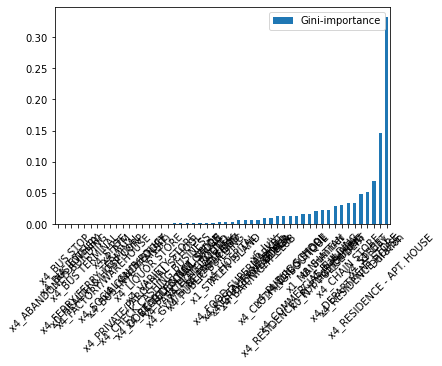

In [27]:
#get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [28]:
df_top_features = importances[importances['Gini-importance']>.0045]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gini-importance,feature
Duration,0.332176,Duration
x4_RESIDENCE - APT. HOUSE,0.146126,x4_RESIDENCE - APT. HOUSE
x9_Day,0.069126,x9_Day
x4_STREET,0.052031,x4_STREET
x4_RESIDENCE-HOUSE,0.048550,x4_RESIDENCE-HOUSE
x4_DEPARTMENT STORE,0.034296,x4_DEPARTMENT STORE
x4_CHAIN STORE,0.033766,x4_CHAIN STORE
x5_Sunday,0.030541,x5_Sunday
x5_Saturday,0.028313,x5_Saturday
x0_N.Y. POLICE DEPT,0.022965,x0_N.Y. POLICE DEPT


In [29]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     64970
           1       0.77      0.79      0.78     64941

    accuracy                           0.78    129911
   macro avg       0.78      0.78      0.78    129911
weighted avg       0.78      0.78      0.78    129911



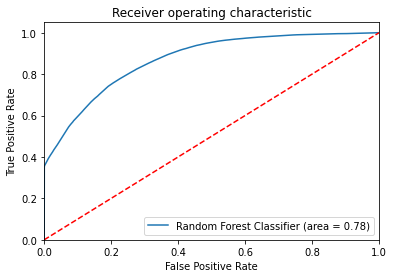

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()